In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\tonyb\Documents\BOSCOBRAND GIT\GITHUB\Marketing_KPI_Project\data\bank-additional\bank-additional-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df['conversion']=df['y'].apply(lambda x: 1 if x == 'yes'else 0)

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


**AGGREGATE CONVERSION RATE**

In [9]:
#total number of conversions
df.conversion.sum()

4640

In [10]:
#total number of clients in the data
df.shape[0]

41188

In [11]:
print('total conversions:%i out of %i'% (df.conversion.sum(),df.shape[0]))

total conversions:4640 out of 41188


In [12]:
print('conversion rate: %0.2f%%' % ((df.conversion.sum()/df.shape[0])*100.0))

conversion rate: 11.27%


**CONVERSION RATES BY AGE**

In [13]:
conversions_by_age = df.groupby (
    by='age'
)['conversion'].sum() / df.groupby (
    by='age'
)['conversion'].count() * 100.0

In [14]:
conversions_by_age

age
17     40.000000
18     42.857143
19     47.619048
20     35.384615
21     28.431373
         ...    
91      0.000000
92     75.000000
94      0.000000
95      0.000000
98    100.000000
Name: conversion, Length: 78, dtype: float64

**VISUALIZATION: CONVERSION RATES BY AGE**

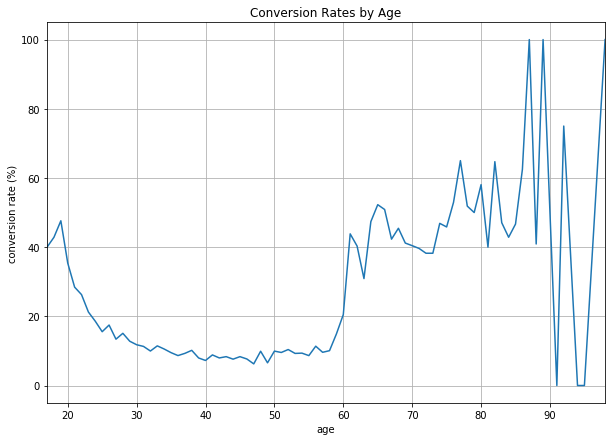

In [15]:
ax = conversions_by_age.plot(
    grid=True,
    figsize=(10,7),
    title='Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

**CONVERSIONS BY AGE GROUP**

In [16]:
df['age_group'] = df['age'].apply(
lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
    else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
    else '[60, 70)' if x < 70 else '70+'
)

In [17]:
conversions_by_age_group = df.groupby (
    by='age_group'
)['conversion'].sum() / df.groupby (
    by='age_group'
)['conversion'].count() * 100.0

In [18]:
conversions_by_age_group

age_group
70+         47.121535
[18, 30)    16.263891
[30, 40)    10.125162
[40, 50)     7.923238
[50, 60)    10.157389
[60, 70)    34.668508
Name: conversion, dtype: float64

**VISUALIZATION: CONVERSION RATES BY AGE GROUP**

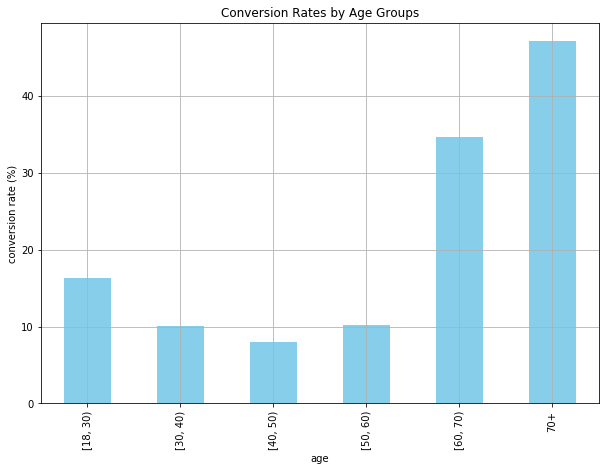

In [19]:
ax=conversions_by_age_group.reindex(
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
).plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10,7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()




**CONVERSIONS VERSUS NON-CONVERSIONS BASED ON MARITAL STATUS**

In [20]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[30, 40)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[40, 50)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"


In [21]:
conversions_by_marital_status=pd.pivot_table(df,values='y', index='marital', columns='conversion', aggfunc=len)

In [22]:
conversions_by_marital_status.columns = ['non_conversions', 'conversions']

In [23]:
conversions_by_marital_status

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


<function matplotlib.pyplot.show(*args, **kw)>

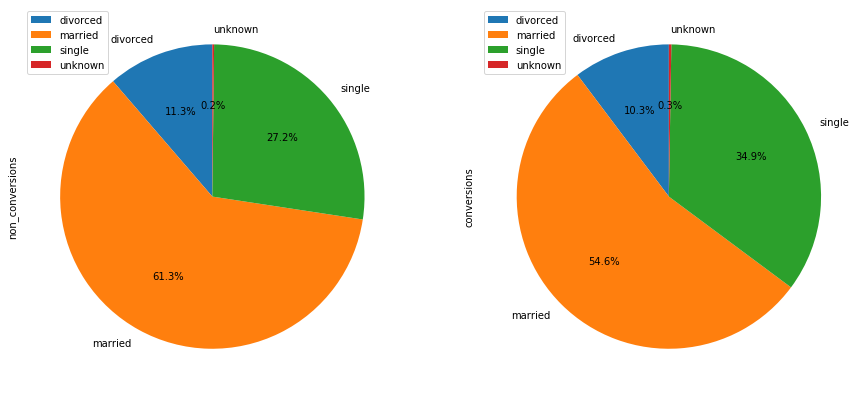

In [24]:
conversions_by_marital_status.plot(
    kind='pie',
    figsize=(15,7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show

**CONVERSIONS BY AGE AND MARITAL STATUS**

In [26]:
age_marital_df=df.groupby(['age_group','marital'])['conversion'].sum().unstack('marital').fillna(0)

In [27]:
age_marital_df = age_marital_df.divide(
    df.groupby(
        by='age_group'
    )['conversion'].count(),axis=0
)

In [28]:
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,0.136461,0.321962,0.012793,0.000000
"[18, 30)",0.002117,0.027871,0.132475,0.000176
"[30, 40)",0.007557,0.052958,0.040383,0.000354
"[40, 50)",0.011970,0.054627,0.012350,0.000285
"[50, 60)",0.017342,0.077674,0.006412,0.000146
"[60, 70)",0.037293,0.301105,0.006906,0.001381


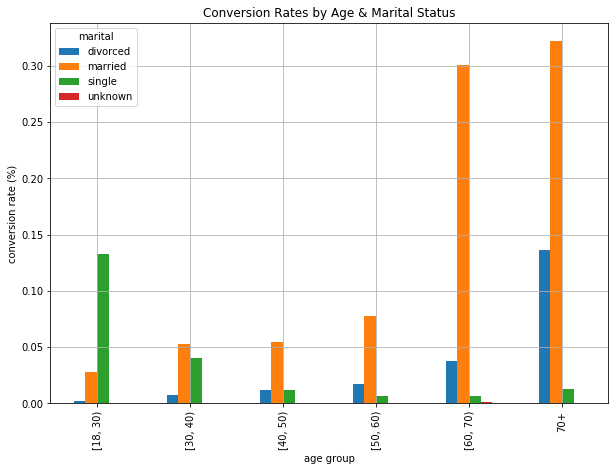

In [29]:
ax=age_marital_df.reindex(
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
).plot(
    kind='bar',
    grid=True,
    figsize=(10,7),
    title='Conversion Rates by Age & Marital Status'
)

ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()




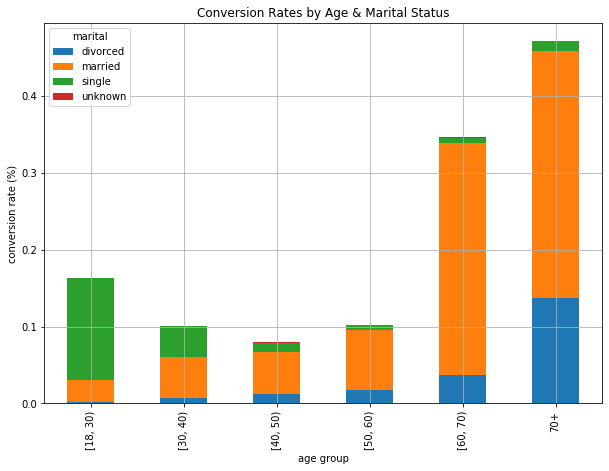

In [31]:
ax=age_marital_df.reindex(
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
).plot(
    kind='bar',
    stacked=True,
    grid=True,
    figsize=(10,7),
    title='Conversion Rates by Age & Marital Status'
)

ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()
